## Example for Support Vector Machine (SVM) using the Iris Data

First we need the standard import

In [1]:
from classy import *

Version:  0.0.10


### Load the Data

In [2]:
data=load_excel('data/iris.xls',verbose=True)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [ 3.75866667  1.19866667  5.84333333  3.054     ]
Median:  [ 4.35  1.3   5.8   3.  ]
Stddev:  [ 1.75852918  0.76061262  0.82530129  0.43214658]


### Look at the data

it's a good idea to look at the data a little bit, know the shapes, etc...

In [3]:
print(data.vectors.shape)
print(data.targets)
print(data.target_names)
print(data.feature_names)

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
['petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm']


since you can't plot 4 dimensions, try plotting some 2D subsets

I don't like the automatic placement of the legend, so lets set it manually

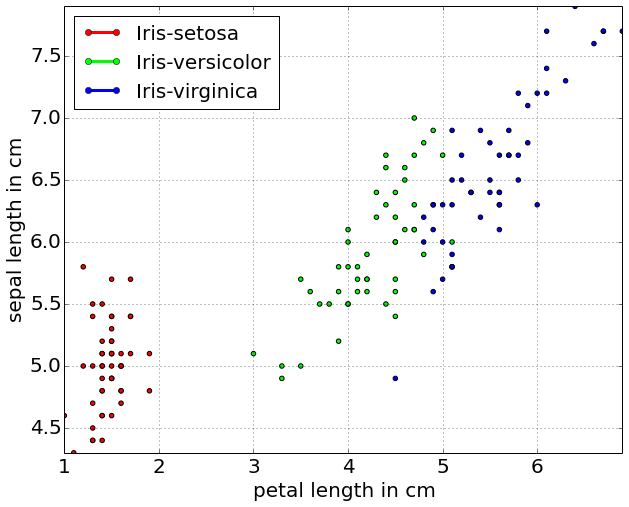

In [4]:
subset=extract_features(data,[0,2])
plot2D(subset,legend_location='upper left')

I don't want to do the classification on this subset, so make sure to use the entire data set.

## Classification

First, we choose a classifier

In [5]:
C=SVM()

Split the data into test and train subsets...

In [6]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (150, 4)
Train vector shape:  (120, 4)
Test vector shape:  (30, 4)


...and then train...

In [7]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

Time Reset
Training time:  0.0133340358734 seconds 


In [8]:
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 99.1666666667
On Test Set: 96.6666666667


some classifiers have properties that are useful to look at.  Naive Bayes has  *means* and *stddevs*...

In [14]:
C.dual_coef_

array([[ 0.58554821,  0.62956426,  0.93338041,  0.        ,  0.05166426,
        -0.58678076, -0.        , -0.1338753 , -1.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.41880073, -0.        , -0.06070035, -0.        ,
        -0.        , -0.        , -0.        , -0.10115862, -0.13883623,
        -0.        , -0.34139802, -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.16423093, -0.        ,
        -0.        , -0.42586883, -0.74419898],
       [ 0.01640521,  0.93954573,  0.95363299,  0.00610769,  0.        ,
         1.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         0.57450793,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  0.        ,  0.37124806,  1.        ,  0.72637804,
         1.        , -1.        , -0.74350224, -1.        , -0.19539073,
        -0.29952554, -0.        , -1.        , -1.        , -1.        ,
   